In [1]:
import pandas as pd

In [2]:
import yfinance as yf
import datetime as dt

In [3]:
start = dt.datetime(2013,6,1)
end = dt.datetime(2022,2,11)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2013-06-03,148.500000,149.750000,145.100006,146.740005
2013-06-04,145.300003,150.899994,145.300003,146.214996
2013-06-05,144.899994,147.000000,144.899994,145.949997
2013-06-06,146.500000,147.000000,145.535004,146.369995
2013-06-07,146.619995,148.485001,144.600006,145.169998
...,...,...,...,...
2022-02-04,217.500000,217.649994,213.000000,213.550003
2022-02-07,213.550003,215.300003,210.199997,211.649994
2022-02-08,212.000000,213.500000,208.100006,210.750000


In [5]:
#column="Close"

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (2144, 4)


In [7]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])
len(data1)

2144

In [8]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1715
X_train length: (1715, 4)
X_test length: (429, 4)
y_train length: (1715, 4)
y_test length: (429, 4)


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]}

In [11]:
def cominbation(dataset,listt):
    print(listt)
    datasetTwo=dataset[listt]
    test_obs = 28
    train =datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]
    from statsmodels.tsa.api import VAR
    for i in [1,2,3,4,5,6,7,8,9,10]:
        model = VAR(train)
        results = model.fit(i)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        print()
    x = model.select_order(maxlags=12)
    order=x.selected_orders["aic"]
    result = model.fit(order)
    #result.summary()
    lagged_Values = train.values[-order:]
    pred = result.forecast(y=lagged_Values,steps=28) 
    preds=pd.DataFrame(pred,columns=listt)
    preds.to_csv("varforecasted_{}.csv".format(test_obs))
    from sklearn.metrics import mean_squared_error
    rmse= round(mean_squared_error(test,pred,squared=False))
    from sklearn.metrics import mean_absolute_percentage_error
    mape=mean_absolute_percentage_error(test,pred)
    performance["Model"].append(listt)
    performance["RMSE"].append(rmse)
    performance["MaPe"].append(mape)
    performance["Lag"].append(order)
    performance["Test"].append(test_obs)
    perf=pd.DataFrame(performance)
    return perf,result,pred

In [12]:
list1 = ["Close", "High"]
list2 = ["Close", "High", "Open"]
list3 = ["Open", "Close", "High", "Low"]

# Combine all lists into a list of lists
all_lists = list1, list2, list3

# Iterate over each list
for listt in all_lists:
    perf, result, pred = cominbation(data1, listt)
    #print(f"List: {listt}, Perf: {perf}, Result: {result}, Pred: {pred}")

#listt=["AQI_calculated","PM10","PM2.5","NOx","NO2","NO","NH3","SO2","CO",'year']

['Close', 'High']
Order = 1
AIC:  -18.421910642910277
BIC:  -18.405862954707498

Order = 2
AIC:  -18.499416558275602
BIC:  -18.472659996466565

Order = 3
AIC:  -18.503688290541923
BIC:  -18.466214510964722

Order = 4
AIC:  -18.510219390998675
BIC:  -18.462020038912087

Order = 5
AIC:  -18.523885237414603
BIC:  -18.46495194747966

Order = 6
AIC:  -18.521586498173292
BIC:  -18.451910894434796

Order = 7
AIC:  -18.522072809875905
BIC:  -18.44164650574392

Order = 8
AIC:  -18.66345757076197
BIC:  -18.57227216899324

Order = 9
AIC:  -18.664678277086992
BIC:  -18.562725369766365

Order = 10
AIC:  -18.668699116446366
BIC:  -18.555970284968136

['Close', 'High', 'Open']
Order = 1
AIC:  -28.617164423080954
BIC:  -28.58506904667539

Order = 2
AIC:  -28.631970286288386
BIC:  -28.57578150648941

Order = 3
AIC:  -28.63732439839355
BIC:  -28.557023442156687

Order = 4
AIC:  -28.64776384067028
BIC:  -28.54333191114934

Order = 5
AIC:  -28.649474763455537
BIC:  -28.520893039961116

Order = 6
AIC:  -28

In [13]:
#perf,result,pred = cominbation(data1,listt)

In [14]:
data1

,Open,High,Low,Close
0,0.517223,0.485749,0.529877,0.522210
1,0.500522,0.491400,0.530969,0.519394
2,0.498434,0.472236,0.528786,0.517972
3,0.506785,0.472236,0.532251,0.520225
4,0.507411,0.479533,0.527149,0.513788
...,...,...,...,...
2139,0.877349,0.819410,0.900409,0.880633
2140,0.856733,0.807862,0.885130,0.870440
2141,0.848643,0.799017,0.873670,0.865612
2142,0.864301,0.810565,0.892224,0.873927


In [15]:
perf

,Model,RMSE,MaPe,Lag,Test
0,"[Close, High]",0,0.020702,11,28
1,"[Close, High, Open]",0,0.023230,5,28
2,"[Open, Close, High, Low]",0,0.023686,10,28


In [16]:
datasetTwo=data1[listt]
test_obs = 28
train =datasetTwo[:-test_obs]
test = datasetTwo[-test_obs:]
from statsmodels.tsa.api import VAR
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()
x = model.select_order(maxlags=12)
order=x.selected_orders["aic"]
result = model.fit(order)
    #result.summary()
lagged_Values = train.values[-order:]
pred = result.forecast(y=lagged_Values,steps=28) 
preds=pd.DataFrame(pred,columns=listt)
preds.to_csv("varforecasted_{}.csv".format(test_obs))
from sklearn.metrics import mean_squared_error
rmse= round(mean_squared_error(test,pred,squared=False))
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(test,pred)
performance["Model"].append(listt)
performance["RMSE"].append(rmse)
performance["MaPe"].append(mape)
performance["Lag"].append(order)
performance["Test"].append(test_obs)
perf=pd.DataFrame(performance)

Order = 1
AIC:  -39.01658695115508
BIC:  -38.9630946571458

Order = 2
AIC:  -39.03829448421904
BIC:  -38.94197086170651

Order = 3
AIC:  -39.04492675169867
BIC:  -38.90573842755478

Order = 4
AIC:  -39.05374294732974
BIC:  -38.871656506113744

Order = 5
AIC:  -39.05826520233478
BIC:  -38.833247186219545

Order = 6
AIC:  -39.0581561960395
BIC:  -38.7901731047376

Order = 7
AIC:  -39.058549993630876
BIC:  -38.74756828432052

Order = 8
AIC:  -39.20163930391486
BIC:  -38.84762539116567

Order = 9
AIC:  -39.338269613243085
BIC:  -38.9411898689417

Order = 10
AIC:  -39.34174393783818
BIC:  -38.901564691113684



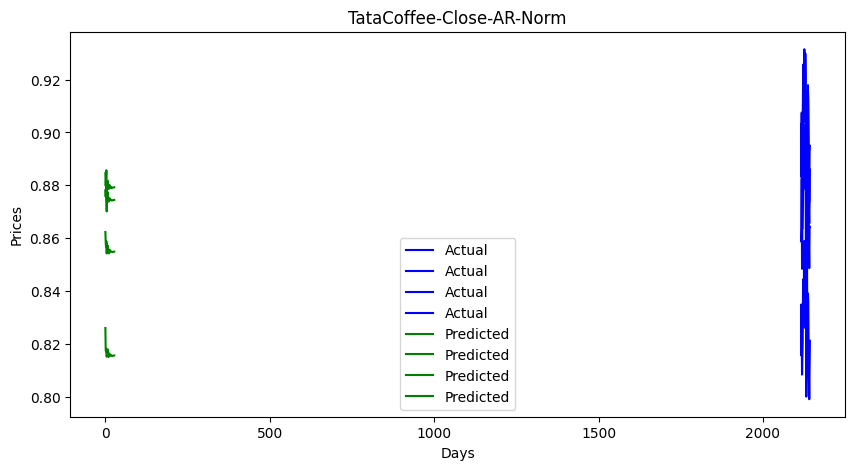

In [17]:
from stockFunctions import graph
graph(test,preds,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [18]:
test

,Open,Close,High,Low
2116,0.858820,0.883315,0.815725,0.896589
2117,0.863779,0.903433,0.834889,0.897408
2118,0.882568,0.887607,0.824570,0.907503
2119,0.848382,0.882779,0.808354,0.889768
2120,0.863779,0.878755,0.814496,0.897681
2121,0.863779,0.891899,0.819902,0.905593
2122,0.874739,0.904238,0.839803,0.915962
2123,0.889353,0.906652,0.844472,0.925784
2124,0.886482,0.907994,0.835381,0.923056
2125,0.878914,0.916577,0.849140,0.917053


In [19]:
columns=["Open","Close", "High", "Low"]

In [20]:
# Create a DataFrame with the specified index range and columns "Close", "High", "Open", "Low"
Actual_y_train = pd.DataFrame(test,columns=columns)
Actual_y_train

,Open,Close,High,Low
2116,0.858820,0.883315,0.815725,0.896589
2117,0.863779,0.903433,0.834889,0.897408
2118,0.882568,0.887607,0.824570,0.907503
2119,0.848382,0.882779,0.808354,0.889768
2120,0.863779,0.878755,0.814496,0.897681
2121,0.863779,0.891899,0.819902,0.905593
2122,0.874739,0.904238,0.839803,0.915962
2123,0.889353,0.906652,0.844472,0.925784
2124,0.886482,0.907994,0.835381,0.923056
2125,0.878914,0.916577,0.849140,0.917053


In [21]:
actual_stock_price_test_ori=Ms.inverse_transform(Actual_y_train)
actual_stock_price_test_ori

array([[213.94999695, 230.65468919, 197.48157122, 216.52426248],
       [214.8999939 , 234.74870724, 200.99349605, 216.67683472],
       [218.5       , 231.52808304, 199.10245855, 218.55864176],
       [211.94999695, 230.54550871, 196.13083406, 215.25277543],
       [214.8999939 , 229.7267051 , 197.25644836, 216.7276973 ],
       [214.8999939 , 232.40146023, 198.24699443, 218.20261918],
       [217.        , 234.9124613 , 201.89398749, 220.1352888 ],
       [219.80000305, 235.40374013, 202.7494516 , 221.96621774],
       [219.25      , 235.67667467, 201.08353695, 221.45762292],
       [217.80000305, 237.42346237, 203.60491572, 220.33872363],
       [221.80000305, 238.73354482, 205.40589859, 223.03426997],
       [222.3999939 , 234.85787106, 204.05516143, 221.20332551],
       [218.        , 234.85787106, 199.37260872, 218.45691659],
       [219.5       , 236.82300306, 204.23525697, 222.72910997],
       [217.69999695, 236.659249  , 204.23525697, 220.99989069],
       [218.        , 224

In [22]:
from stockFunctions import conversionSingle
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,columns)

In [23]:
actual_stock_price_test_oriA

,Open,Close,High,Low
0,213.949997,230.654689,197.481571,216.524262
1,214.899994,234.748707,200.993496,216.676835
2,218.5,231.528083,199.102459,218.558642
3,211.949997,230.545509,196.130834,215.252775
4,214.899994,229.726705,197.256448,216.727697
5,214.899994,232.40146,198.246994,218.202619
6,217.0,234.912461,201.893987,220.135289
7,219.800003,235.40374,202.749452,221.966218
8,219.25,235.676675,201.083537,221.457623
9,217.800003,237.423462,203.604916,220.338724


In [24]:
preds

,Open,Close,High,Low
0,0.862324,0.878077,0.825982,0.884579
1,0.858365,0.875689,0.817559,0.879810
2,0.856617,0.879318,0.817036,0.882667
3,0.858831,0.875373,0.818071,0.885699
4,0.854199,0.870123,0.815102,0.873987
5,0.857746,0.876231,0.816412,0.879134
6,0.856400,0.875941,0.817234,0.879806
7,0.855667,0.877380,0.817867,0.881702
8,0.857010,0.875020,0.817707,0.881222
9,0.855905,0.874356,0.816515,0.879350


In [25]:
actual_stock_price_test_ori_p=Ms.inverse_transform(preds)
actual_stock_price_test_ori_p

array([[214.62132918, 229.58864579, 199.36121333, 214.28554671],
       [213.8627341 , 229.10262033, 197.81773132, 213.39667862],
       [213.52773776, 229.84119168, 197.72175542, 213.92912681],
       [213.95200794, 229.038361  , 197.91157252, 214.49424315],
       [213.06454624, 227.96997054, 197.36744225, 212.31121283],
       [213.74418832, 229.21293014, 197.60746178, 213.27050857],
       [213.48631754, 229.15406537, 197.75820059, 213.39586701],
       [213.34572512, 229.44678123, 197.87408914, 213.74925845],
       [213.60311329, 228.96659576, 197.84472365, 213.65977633],
       [213.39134158, 228.83145647, 197.6264497 , 213.31091776],
       [213.20185518, 228.71730632, 197.34816672, 213.17450292],
       [213.06872477, 228.84847715, 197.43843079, 213.21519849],
       [213.19272449, 228.99866345, 197.49584395, 213.44863232],
       [213.26586904, 228.97499984, 197.57583561, 213.41512237],
       [213.31452152, 228.84880112, 197.43382755, 213.28498353],
       [213.20130413, 228

In [26]:
actual_stock_price_test_ori_pr=conversionSingle(actual_stock_price_test_ori_p,columns)
actual_stock_price_test_ori_pr

,Open,Close,High,Low
0,214.621329,229.588646,199.361213,214.285547
1,213.862734,229.10262,197.817731,213.396679
2,213.527738,229.841192,197.721755,213.929127
3,213.952008,229.038361,197.911573,214.494243
4,213.064546,227.969971,197.367442,212.311213
5,213.744188,229.21293,197.607462,213.270509
6,213.486318,229.154065,197.758201,213.395867
7,213.345725,229.446781,197.874089,213.749258
8,213.603113,228.966596,197.844724,213.659776
9,213.391342,228.831456,197.62645,213.310918


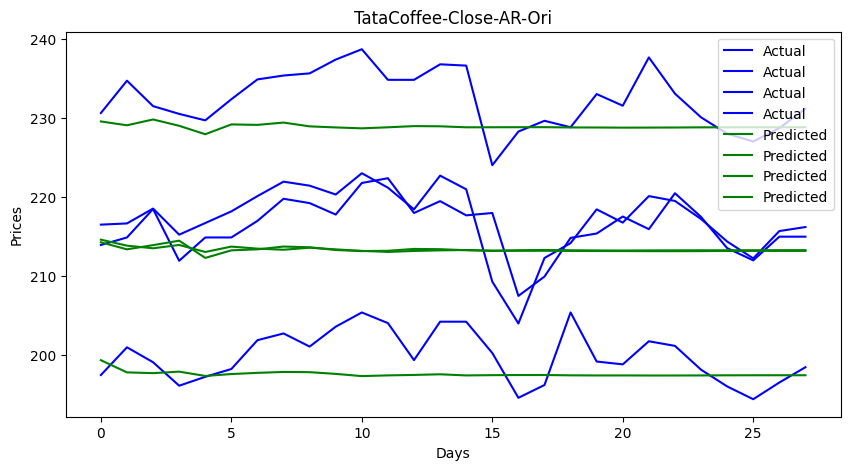

In [27]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,actual_stock_price_test_ori_pr,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [28]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,actual_stock_price_test_ori_pr)

RMSE-Testset: 4.77253903344278
maPe-Testset: 0.01830883930920497


In [29]:
forecast_values = results.forecast(y=lagged_Values, steps=5)

In [30]:
forecast_values

array([[0.86232426, 0.87807691, 0.82598206, 0.8845791 ],
       [0.858365  , 0.87568858, 0.81755924, 0.87981049],
       [0.85661658, 0.87931792, 0.8170355 , 0.88266697],
       [0.85883094, 0.87537281, 0.81807134, 0.88569871],
       [0.85419909, 0.87012273, 0.815102  , 0.87398718]])

In [31]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast_values,["Open","High","Low","Close"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Open","High","Low","Close"])

In [32]:
forecast_stock_price_test_oriF

,Open,High,Low,Close
0,214.621329,229.588646,199.361213,214.285547
1,213.862734,229.10262,197.817731,213.396679
2,213.527738,229.841192,197.721755,213.929127
3,213.952008,229.038361,197.911573,214.494243
4,213.064546,227.969971,197.367442,212.311213
